# Experimental Results on the Toy exemple

## Imports of the libraries and our functions

In [1]:
#imports
import numpy as np
import numpy.linalg as npl
import numpy.random as npr

import scipy as sp
import scipy.linalg as spl
import scipy.stats as sps
import time
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
from os import getcwd
getcwd()

'C:\\Users\\vetle\\OneDrive\\Dokumenter\\4MIC-S2\\mcmc-epidemic'

In [2]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2

#from our_package import * #allows us to use our functions directly
from toy_example import *

## Set up parameters

In [5]:
Lambda = 1
T = 6
#param_accept = 0.3
a = 1
b = 1

## Behavior of $Y$, $x_{true}$, and $\tilde{x}_{true}$

### Variables explaination
- $Y$: mean of L2-norm part in distribution used for RW
- $x_{true}$: reproduction rate
- $\tilde{x}_{true}$: second-derivative of reproduction rate

### Case 1: Simulation under $\mathcal{E}(\lambda)$ law

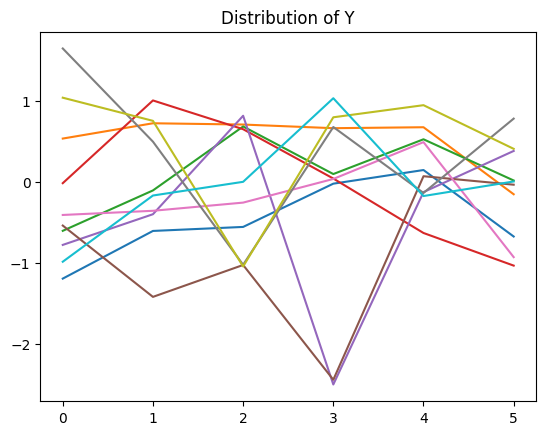

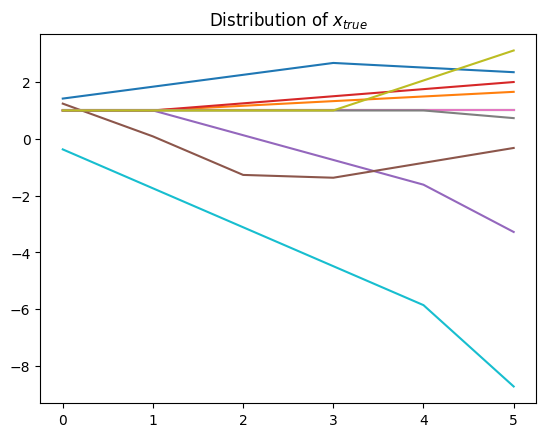

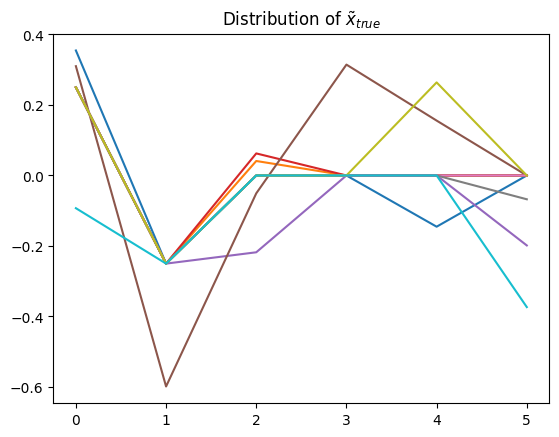

In [30]:
Lambda = 5
taille_echant = 10
Y = np.zeros((taille_echant, T))
x_true = np.zeros((taille_echant, T))
x_tilde_true = np.zeros((taille_echant, T))
for i in range(taille_echant):
    Y[i,:], x_true[i,:], x_tilde_true[i,:] = Computation_Y_simu_debug(T, Lambda,a,b)
    fig = plt.figure(1)
    plt.title("Distribution of Y")
    plt.plot(Y[i,:])
    fig = plt.figure(2)
    plt.title(r"Distribution of $x_{true}$")
    plt.plot(x_true[i,:])
    fig = plt.figure(3)
    plt.plot(x_tilde_true[i,:])
    plt.title(r"Distribution of $\tilde{x}_{true}$")
plt.show()

> We wanted our $x_{true}$ to have the shape of a hat to be the same kind of the real epidemiological data of Covid19 but with our simulations, we can see that it is almost never the case and that the value for some component of some simulations is exploding with the value  of $T$. So we forget this way of simulating $Y$ and we will just fix the value of  $x_{true}$ to get this hat shape and then transform it to get $Y$.

### Case 2: Deterministic $x_{true}$

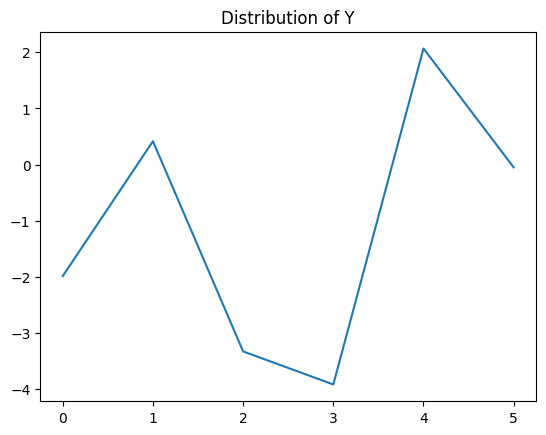

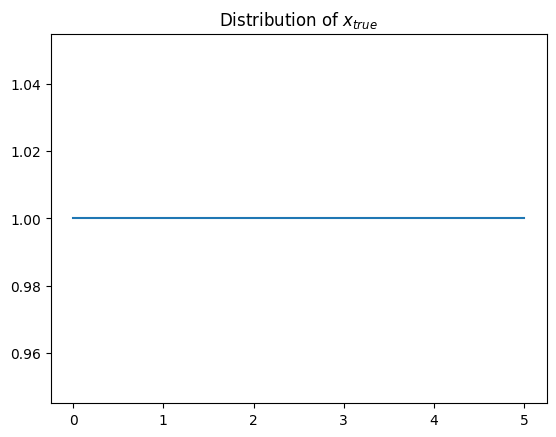

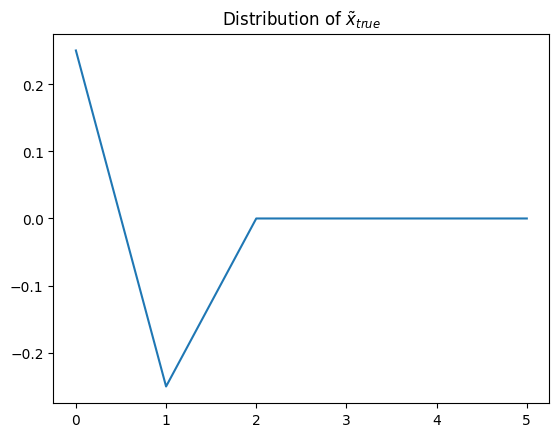

In [41]:
taille_echant = 1
Y = np.zeros((taille_echant, T))
x_true = np.zeros((taille_echant, T))
x_tilde_true = np.zeros((taille_echant, T))
for i in range(taille_echant):
    Y[i,:] = Computation_Y_circ_test(T, a, b)
    x_true[i,:], x_tilde_true[i,:] = ComputeArgmax(T, Lambda, Y[i,:], a, b)
    fig = plt.figure(1)
    plt.title("Distribution of Y")
    plt.plot(Y[i,:])
    fig = plt.figure(2)
    plt.title(r"Distribution of $x_{true}$")
    plt.plot(x_true[i,:])
    fig = plt.figure(3)
    plt.title(r"Distribution of $\tilde{x}_{true}$")
    plt.plot(x_tilde_true[i,:])

plt.show()

## Choice of lambda

> We set lambda such that the value of the prior at x_true is equal to 0.99 (almost equal to the value of the prior at the argmax, which is 1). We remind that the prior is the L1 norm part of the distribution.

In [5]:
#Y = Computation_Y_exp(T, Lambda, a, b)
#Y, Lambda, a, b = Computation_Y_circ_det(T, 0.99)
Y = Computation_Y_circ_test(T, a, b)
#Lambda = 1
#print(Lambda)

### Comparison with Matlab results

In [1]:
# theta_tab_s, accepts_s, gammas_s = MetropolisHastings_test(T, Lambda, Y, a,b, niter=1e5,method="source")
# theta_tab_i, accepts_i, gammas_i = MetropolisHastings_test(T, Lambda, Y, a,b, niter=1e5,method="image")
# theta_tab_ss, accepts_ss, gammas_ss = MetropolisHastings_test(T, Lambda, Y, a,b, niter=1e5,method="subdiff_source")
# theta_tab_si, accepts_si, gammas_si = MetropolisHastings_test(T, Lambda, Y, a,b, niter=1e5,method="subdiff_image")
# theta_tab_pi, accepts_pi, gammas_pi = MH_Prox_Image_test(T, Lambda, Y, a, b, niter=1e5)
# theta_tab_ps, accepts_ps, gammas_ps = MH_Prox_Source_test(T, Lambda, Y, a, b, niter=1e5)

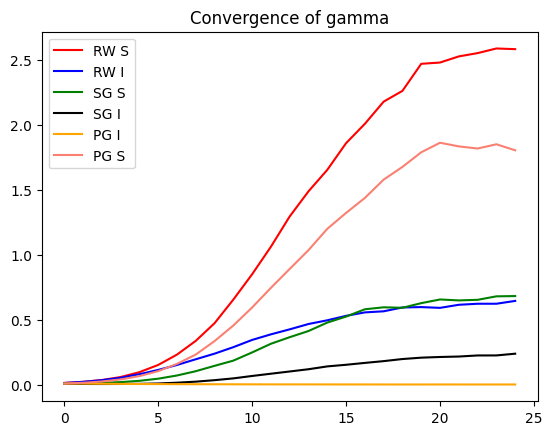

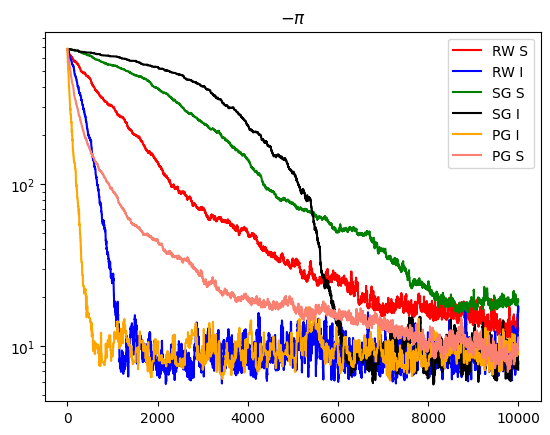

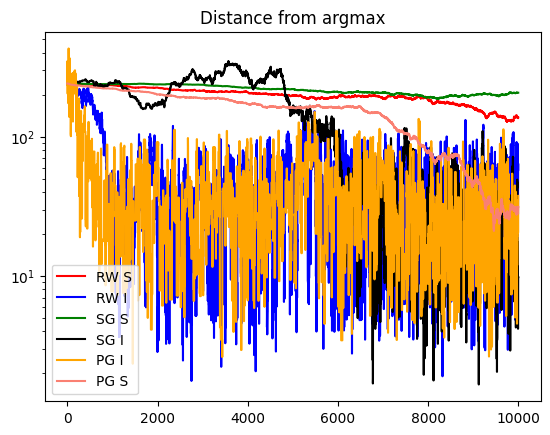

In [30]:
plt.figure()
plt.title("Convergence of gamma")
plt.plot(gammas_s, color = "red", label = "RW S")
plt.plot(gammas_i, color = "blue", label = "RW I")
plt.plot(gammas_ss, color = "green", label = "SG S")
plt.plot(gammas_si, color = "black", label = "SG I")
plt.plot(gammas_pi, color = "orange", label = "PG I")
plt.plot(gammas_ps, color = "salmon", label = "PG S")
plt.legend()
plt.show()

plt.figure()
plt.title(r"$-\pi$")
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T,a,b)
plt.plot(-LogDistributionPi_Tab(theta_tab_s[:10000], Y, A, D, sh, Lambda), color = "red", label = "RW S")
plt.plot(-LogDistributionPi_Tab(theta_tab_i[:10000], Y, A, D, sh, Lambda), color = "blue", label = "RW I")
plt.plot(-LogDistributionPi_Tab(theta_tab_ss[:10000], Y, A, D, sh, Lambda), color = "green", label = "SG S")
plt.plot(-LogDistributionPi_Tab(theta_tab_si[:10000], Y, A, D, sh, Lambda), color = "black", label = "SG I")
plt.plot(-LogDistributionPi_Tab(theta_tab_pi[:10000], Y, A, D, sh, Lambda), color = "orange", label = "PG I")
plt.plot(-LogDistributionPi_Tab(theta_tab_ps[:10000], Y, A, D, sh, Lambda), color = "salmon", label = "PG S")
plt.yscale("log")
plt.legend()
plt.show()

plt.figure()
plt.title("Distance from argmax")
argmax = ComputeArgmax(T, Lambda, Y,a,b)[0]
plt.plot(np.linalg.norm(theta_tab_s[:10000]-argmax,axis=1), color = "red", label = "RW S")
plt.plot(np.linalg.norm(theta_tab_i[:10000]-argmax,axis=1), color = "blue", label = "RW I")
plt.plot(np.linalg.norm(theta_tab_ss[:10000]-argmax,axis=1), color = "green", label = "SG S")
plt.plot(np.linalg.norm(theta_tab_si[:10000]-argmax,axis=1), color = "black", label = "SG I")
plt.plot(np.linalg.norm(theta_tab_pi[:10000]-argmax,axis=1), color = "orange", label = "PG I")
plt.plot(np.linalg.norm(theta_tab_ps[:10000]-argmax,axis=1), color = "salmon", label = "PG S")
plt.yscale("log")
plt.legend()
plt.show()

## Theoretical results on the toy example (mean, argmax and quantiles)

In [6]:
### we call the different functions
#Lambdas = [100] + [0.5*i for i in range(100,1000,100)] + [750,1000]
#Y_simu=Create_DicoY(T,[Lambda],a,b)
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T, a, b)
Y ,Lambda, *_= Computation_Y_circ_det(T)
x,x_tilde = ComputeArgmax(T,Lambda, Y,a,b)
print(f"T: {T}")
print(f"shape of x: {x.shape}")
print(f"shape of x_tilde: {x_tilde.shape}")
mu,mu_tilde = ComputeMeans(T,Lambda, Y,a,b)
q1 = ComputeQuantiles(T,Lambda,0.975*np.ones(T), Y,a,b)
q2 = ComputeQuantiles(T,Lambda,0.025*np.ones(T), Y,a,b)
med = ComputeQuantiles(T,Lambda,0.5*np.ones(T), Y,a,b)
t2=time.time()

T: 6
shape of x: (6,)
shape of x_tilde: (6,)


NameError: name 'time' is not defined

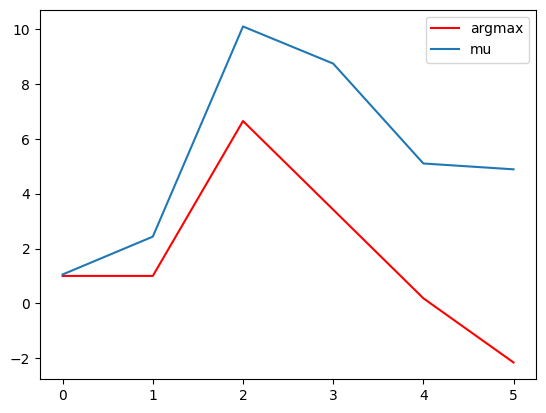

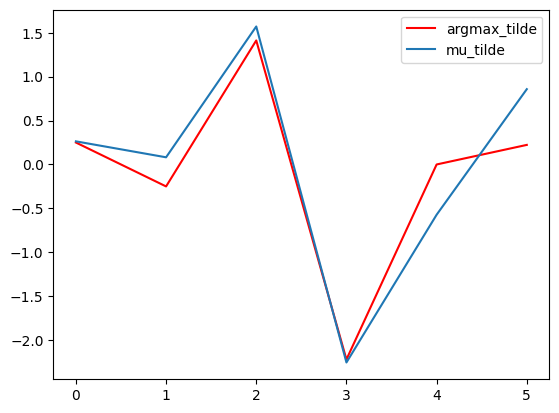

[ 0.25       -0.25        1.41232361 -2.22052569 -0.          0.22293322]


In [32]:
plt.figure()
plt.plot(x, color = "red", label= "argmax")
plt.plot(mu, label = "mu")
plt.legend()
plt.figure()
plt.plot(x_tilde, color = "red", label= "argmax_tilde")
plt.plot(mu_tilde, label = "mu_tilde")
plt.legend()
plt.show()
print(x_tilde)

## Simulation with the different methods

End of the burn-in


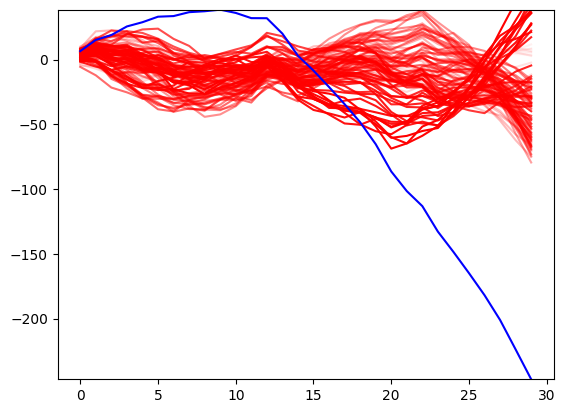

End of the burn-in


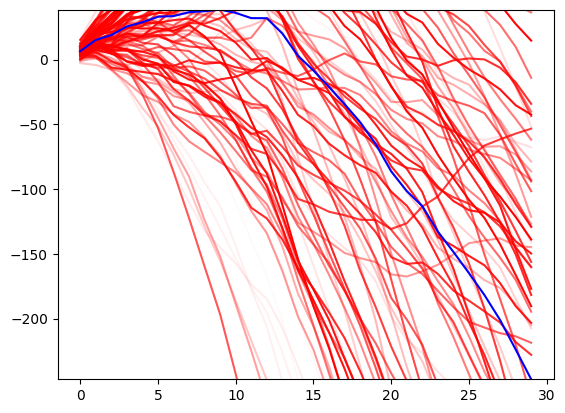

End of the burn-in


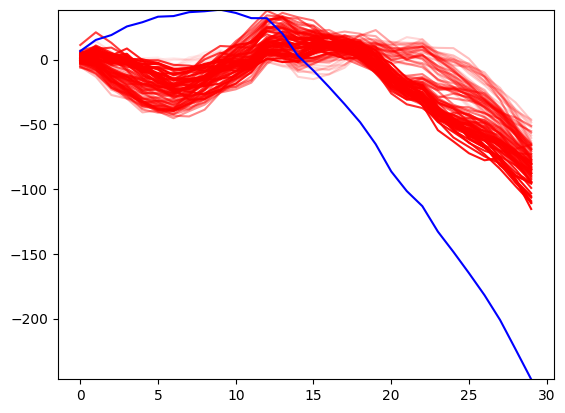

End of the burn-in


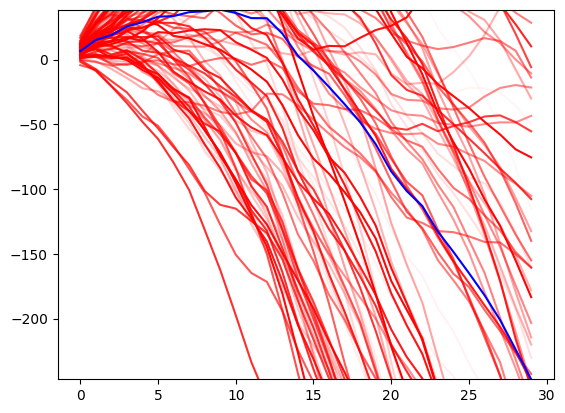

332.03713941574097


In [28]:
t1=time.time()
sim_theta1,sim_theta_tilde1,sim_accepts1,sim_gammas1, Mean1,end_source = MetropolisHastings(T,Lambda, Y, a,b,1e5, "source")
sim_theta2,sim_theta_tilde2,sim_accepts2,sim_gammas2, Mean2,end_image = MetropolisHastings(T,Lambda, Y, a,b,1e5, "image")
sim_theta3,sim_theta_tilde3,sim_accepts3,sim_gammas3, Mean3,end_subdiff_source = MetropolisHastings(T,Lambda, Y,a,b, 1e5, "subdiff_source")
sim_theta4,sim_theta_tilde4,sim_accepts4,sim_gammas4, Mean4,end_subdiff_image = MetropolisHastings(T,Lambda, Y, a,b,1e5, "subdiff_image")
t2=time.time()
print(t2-t1)

taux d'accept 0.927
gamma 0.001
taux d'accept 0.909
gamma 0.0016870000000000001
taux d'accept 0.869
gamma 0.0028156030000000003
taux d'accept 0.852
gamma 0.0045866172870000005
taux d'accept 0.805
gamma 0.007393627066644001
taux d'accept 0.767
gamma 0.011571026359297862
taux d'accept 0.718
gamma 0.017668957250647835
taux d'accept 0.677
gamma 0.0261147188164575
taux d'accept 0.609
gamma 0.03752685093924943
taux d'accept 0.525
gamma 0.051374258935832466
taux d'accept 0.516
gamma 0.06601592273254472
taux d'accept 0.466
gamma 0.08423631740672707
taux d'accept 0.384
gamma 0.1032737251406474
taux d'accept 0.366
gamma 0.11814514156090061
taux d'accept 0.304
gamma 0.1330314293975741
taux d'accept 0.301
gamma 0.14154544087901882
taux d'accept 0.297
gamma 0.15017971277263897
taux d'accept 0.31
gamma 0.1587399564006794
taux d'accept 0.273
gamma 0.16985175334872696
taux d'accept 0.268
gamma 0.17545686120923495
taux d'accept 0.27
gamma 0.18036965332309354
taux d'accept 0.256
gamma 0.1857807429227863

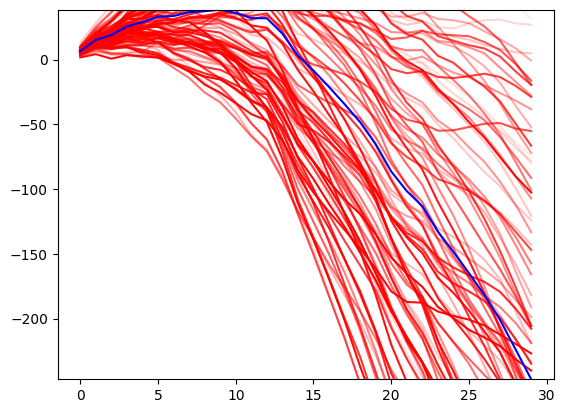

In [36]:
theta_tab_prox_image,theta_tab_prox_image_tilde,_,_,_,end_prox_image = MH_Prox_Image(T, Lambda, Y, a, b)

In [37]:
q = np.array([2.5,50,97.5])
quantiles_emp1 = Quantiles(sim_theta_tilde1, q,T)
quantiles_emp2 = Quantiles(sim_theta_tilde2, q,T)
quantiles_emp3 = Quantiles(sim_theta_tilde3, q,T)
quantiles_emp4 = Quantiles(sim_theta_tilde4, q,T)
quantiles_emp5 = Quantiles(theta_tab_prox_image_tilde, q,T)

## Visualisation of theory VS simulation

C:\Users\arman\AppData\Local\Temp\ipykernel_13428\2556434834.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  axes[1].legend()


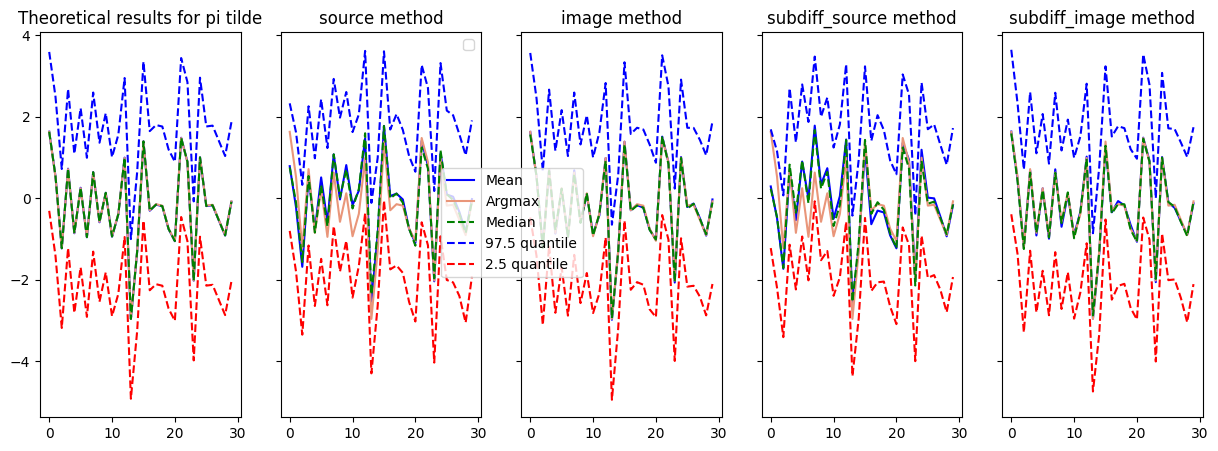

Qualité d'estimations des quantiles : 
Source :  0.3486881250099998
Image :  0.05568663940559877
Source Subdiff :  0.39018015099206627
Image Subdiff :  0.08014486506888255
Prox Image :  0.942344119006111


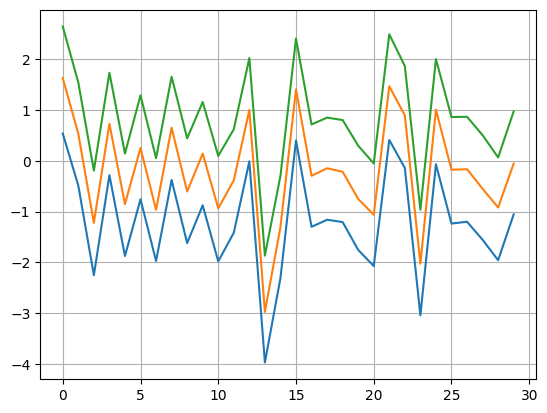

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(15, 5), sharey=True)
#Plot of theoretical results
axes[0].plot(mu_tilde,color="blue",label="Mean")
axes[0].plot(x_tilde,color="darksalmon",label="Argmax")
axes[0].plot(med,'g--',label="Median")
axes[0].plot(q1,'b--',label="97.5 quantile")
axes[0].plot(q2,'r--',label="2.5 quantile")
axes[0].set_title("Theoretical results for pi tilde")


#Plot of empirical results with method source
axes[1].plot(D@Mean1,color="blue")
axes[1].plot(x_tilde,color="darksalmon")
axes[1].plot(quantiles_emp1[1],'g--')
axes[1].plot(quantiles_emp1[2],'b--')
axes[1].plot(quantiles_emp1[0],'r--')
axes[1].set_title("source method")
axes[1].legend()


#Plot of empirical results with method image
axes[2].plot(D@Mean2,color="blue")
axes[2].plot(x_tilde,color="darksalmon")
axes[2].plot(quantiles_emp2[1],'g--')
axes[2].plot(quantiles_emp2[2],'b--')
axes[2].plot(quantiles_emp2[0],'r--')
axes[2].set_title("image method")

#Plot of empirical results with method subdiff_source
axes[3].plot(D@Mean3,color="blue")
axes[3].plot(x_tilde,color="darksalmon")
axes[3].plot(quantiles_emp3[1],'g--')
axes[3].plot(quantiles_emp3[2],'b--')
axes[3].plot(quantiles_emp3[0],'r--')
axes[3].set_title("subdiff_source method")

#Plot of empirical results with method subdiff_image
axes[4].plot(D@Mean4,color="blue")
axes[4].plot(x_tilde,color="darksalmon")
axes[4].plot(quantiles_emp4[1],'g--')
axes[4].plot(quantiles_emp4[2],'b--')
axes[4].plot(quantiles_emp4[0],'r--')
axes[4].set_title("subdiff_image method")
# Shrink current axis by 20%
box0,box1 = axes[0].get_position(),axes[1].get_position()
#axes[0].set_position([box0.x0, box0.y0, box0.width * 0.8, box0.height])
#axes[1].set_position([box1.x0*0.8, box1.y0, box1.width * 0.8, box1.height])
fig.legend(loc=(0.8*box1.x0+box1.width,box1.height/2))
plt.show()

"""
quantile_quality_source = np.sum(abs(quantiles_emp1[0] - q2))/(np.sum(abs(q2))) + np.sum(abs(quantiles_emp1[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp1[2] - q1))/np.sum(abs(q1))
quantile_quality_image = np.sum(abs(quantiles_emp2[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp2[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp2[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_source = np.sum(abs(quantiles_emp3[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp3[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp3[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_image = np.sum(abs(quantiles_emp4[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp4[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp4[2] - q1))/np.sum(abs(q1))
quantile_quality_prox_image = np.sum(abs(quantiles_emp5[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp5[1] - med))/np.sum(abs(med)) + np.sum(abs(quantiles_emp5[2] - q1))/np.sum(abs(q1))
"""

quantile_quality_source = np.sum(abs(quantiles_emp1[0] - q2))/(np.sum(abs(q2)))  + np.sum(abs(quantiles_emp1[2] - q1))/np.sum(abs(q1))
quantile_quality_image = np.sum(abs(quantiles_emp2[0] - q2))/np.sum(abs(q2))  + np.sum(abs(quantiles_emp2[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_source = np.sum(abs(quantiles_emp3[0] - q2))/np.sum(abs(q2))  + np.sum(abs(quantiles_emp3[2] - q1))/np.sum(abs(q1))
quantile_quality_subdiff_image = np.sum(abs(quantiles_emp4[0] - q2))/np.sum(abs(q2)) + np.sum(abs(quantiles_emp4[2] - q1))/np.sum(abs(q1))
quantile_quality_prox_image = np.sum(abs(quantiles_emp5[0] - q2))/np.sum(abs(q2))  + np.sum(abs(quantiles_emp5[2] - q1))/np.sum(abs(q1))

print("Qualité d'estimations des quantiles : ")

print("Source : ", quantile_quality_source)
print("Image : ", quantile_quality_image)
print("Source Subdiff : ", quantile_quality_subdiff_source)
print("Image Subdiff : ", quantile_quality_subdiff_image)
print("Prox Image : ", quantile_quality_prox_image)

plt.figure()
plt.plot(quantiles_emp5[0])
plt.plot(quantiles_emp5[1])
plt.plot(quantiles_emp5[2])
plt.grid()

## Convergence of the empirical mean (five first dimensions, without burn-in)

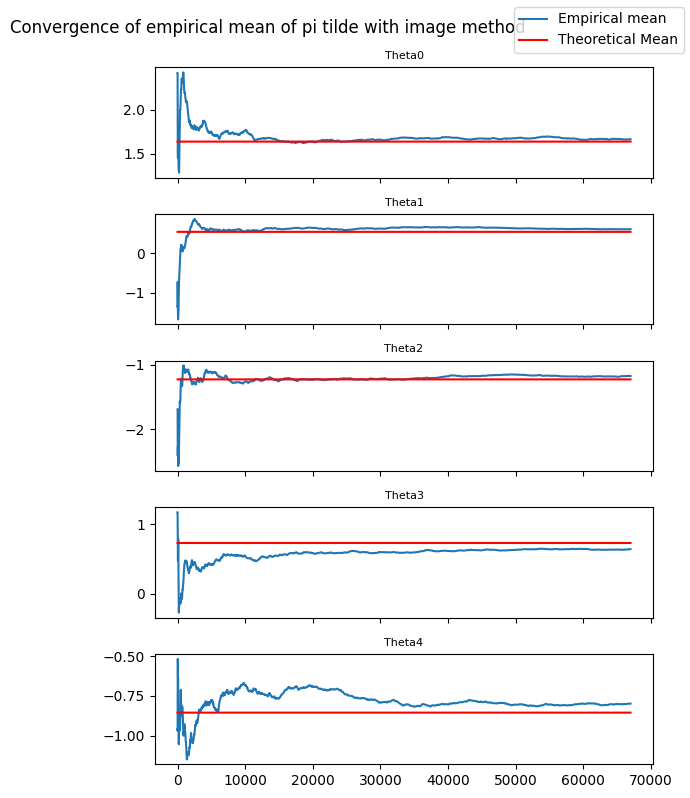

In [12]:
#Convergence plot of the mean of theta_tilde
nb_save=sim_theta2.shape[0] - end_image
x=np.linspace(1,nb_save,nb_save)
mean_tab=np.cumsum(sim_theta_tilde2[end_image:],axis=0)

fig,Axes = plt.subplots(5,1,figsize=(6,8),sharex=True)
for i in range(5):
    ax = Axes[i]
    res=mean_tab[:,i]/x
    ax.plot(x,res,label="Empirical mean" if i==0 else "")
    ax.plot(x,mu_tilde[i]*np.ones(nb_save),'r',label="Theoretical Mean" if i==0 else "")
    #ax.axvline(end_image,color="green")
    ax.set_title(f"Theta{i}",fontsize=8)

fig.suptitle("Convergence of empirical mean of pi tilde with image method", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()

## Convergence of the acceptance rate (only burn-in phase)

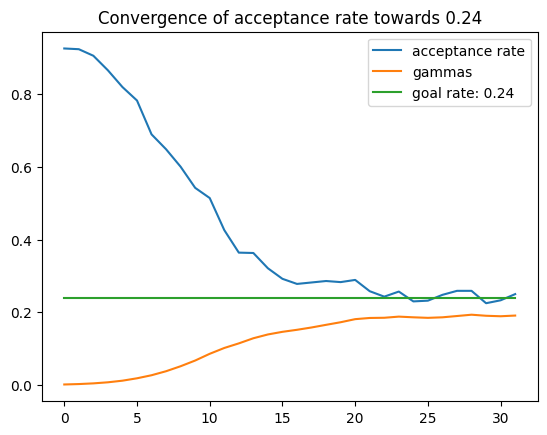

In [13]:
#print(sim_accepts2)
#print(end_image)
#print(len(sim_gammas2))
plt.plot(sim_accepts2[:int(end_image/1000)],label="acceptance rate")
plt.plot(sim_gammas2[:int(end_image/1000)],label="gammas")
plt.plot(np.ones(len(sim_accepts2[:int(end_image/1000)]))*0.24,label="goal rate: 0.24")
plt.title("Convergence of acceptance rate towards 0.24")
plt.legend()
plt.show()

Pour lambda > 10, le calcul de la moyenne théorique ne fonctionne pas (divisions par zéro, on demande un degré de précision dans l'estimation de la loi normale N(0,1) qui est trop important). Il faudrait robustifier le code.

## Comparison of the empirical Log-Pi Distribution to the argmax

End of the burn-in


C:\Users\arman\AppData\Local\Temp\ipykernel_13428\3404295126.py:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


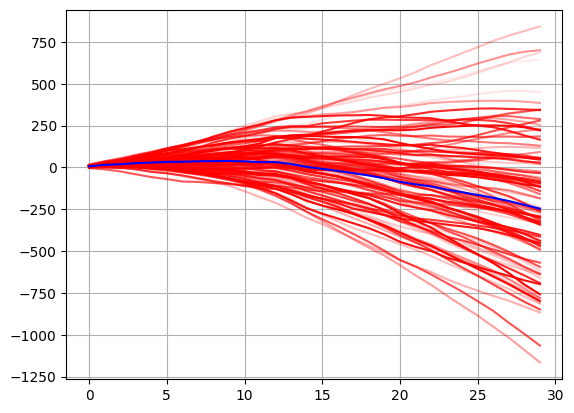

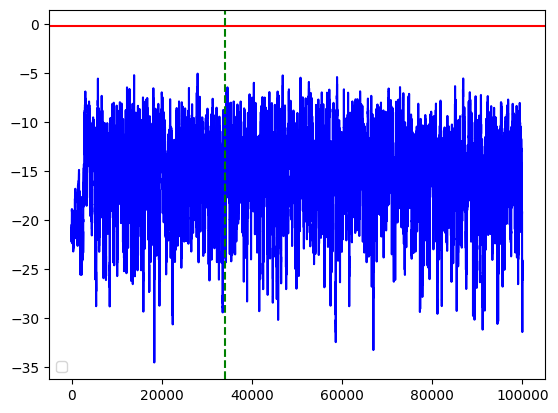

In [15]:
#plt.figure()
#Y = Y_simu[Lambda]
#Y,Lambda=Computation_Y_circ(T,a,b)
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T, a, b)
theta_tab, theta_tilde_tab, accepts, gammas, theta_mean,end_image = MetropolisHastings(T, Lambda, Y, a,b,method = "image")
plt.figure()
plt.plot(LogDistributionPi_Tab(theta_tab, Y, A, D, sh, Lambda), color = "blue")
plt.axhline(LogDistributionPi(ComputeArgmax(T, Lambda, Y,a,b)[0], Y, A, D, sh, Lambda), color = "red")
plt.axvline(end_image,color="green",linestyle="--")
plt.legend()
plt.show()

The LogPi Distibution of the chain is always lower than the LogPi of the Argmax (as it is the maximum value). When T gets higher, the LogPi distribution gets lower compared to the argmax, it is understandable if we visualize the distribution as a product (even though it is not an independence case here).

Studying Pi Distribution of our chain and comparing to argmax (the chain should oscillate around the argmax when enough iterations are done).

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
C:\Users\arman\AppData\Local\Temp\ipykernel_13428\2292648833.py:14: SyntaxWarning: invalid escape sequence '\p'
  fig.suptitle("Accuracy of simulation and argmax for $\pi$ distribution", x=0.3)
C:\Users\arman\AppData\Local\Temp\ipykernel_13428\2292648833.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


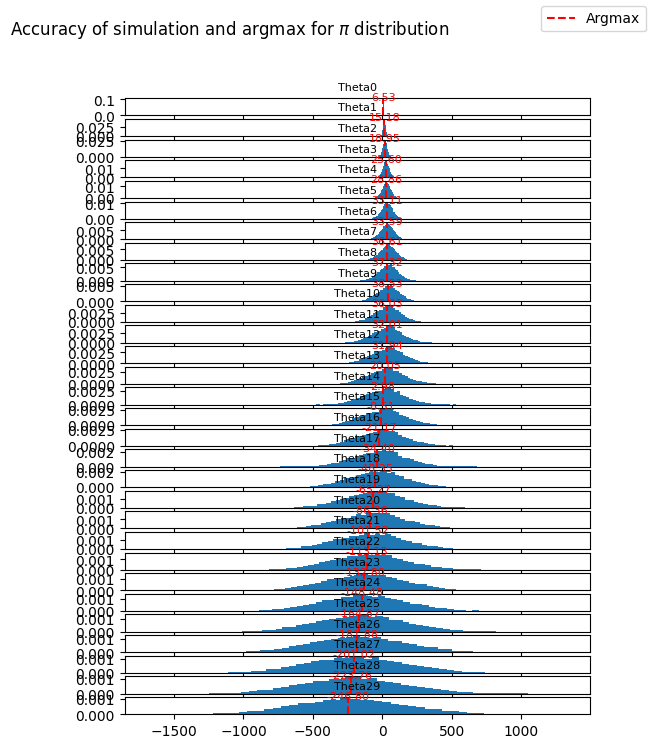

In [16]:
fig, axes = plt.subplots(nrows=T, ncols=1, figsize=(6, 8), sharex=True)
nb_save=theta_tab.shape[0]
argmax=ComputeArgmax(T, Lambda, Y, a, b)[0]
for i in range(T):
    ax = axes[i]
    ax.hist(theta_tab[:,i],bins=50,density=True)
    ax.plot(argmax[i],0,color='red')
    ax.axvline(argmax[i], color='red', linestyle='dashed', label="Argmax" if i==0 else "")
    ax.text(argmax[i], ax.get_ylim()[1] * 0.9, f"{argmax[i]:.2f}", 
            color='red', fontsize=8, ha='center')
    ax.set_title(f"Theta{i}",fontsize=8)


fig.suptitle("Accuracy of simulation and argmax for $\pi$ distribution", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()

We can see that for the first components, the distibution of the simulation is quite well gaussian and we find quite well the argmax but as we increase the dimensions, this becomes less and less accurate, the distribution variance increases very fast and the distribution of the simulation seems to diverge to the real one as the argmax is not anymore equal to the graphic one.

We see that for further dimensions, the argmax takes lower values so if we take a uniform (0, ..., 0) starting point, it takes more time for the chain to reach its argmax, as the distribution function is really flat. (Arman's hypothesis)

C:\Users\arman\AppData\Local\Temp\ipykernel_13428\220238300.py:15: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  fig.tight_layout()


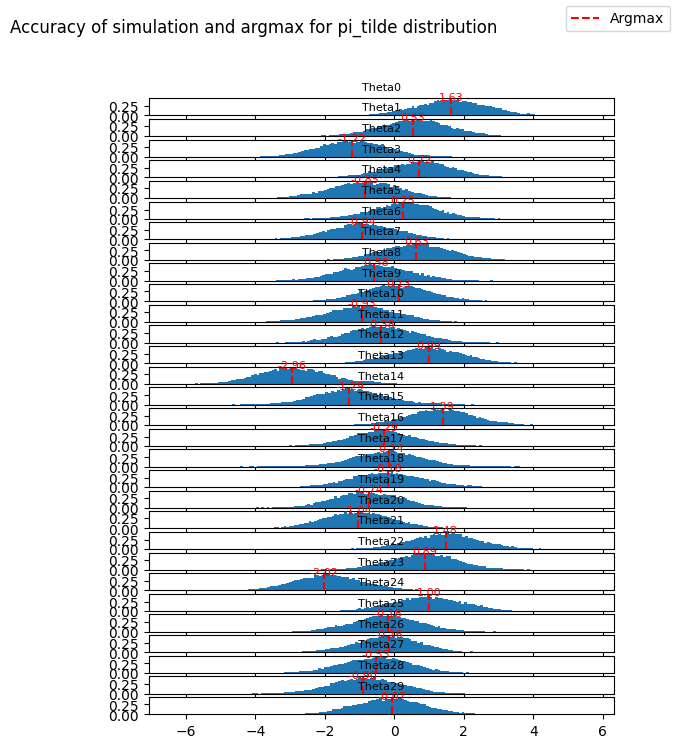

In [17]:
fig, axes = plt.subplots(nrows=T, ncols=1, figsize=(6, 8), sharex=True)
nb_save=theta_tab.shape[0]
argmax=ComputeArgmax(T, Lambda, Y, a, b)[1]
for i in range(T):
    ax = axes[i]
    ax.hist(theta_tilde_tab[:,i],bins=100,density=True)
    ax.plot(argmax[i],0,color='red')
    ax.axvline(argmax[i], color='red', linestyle='dashed', label="Argmax" if i==0 else "")
    ax.text(argmax[i], ax.get_ylim()[1] * 0.9, f"{argmax[i]:.2f}", 
            color='red', fontsize=8, ha='center')
    ax.set_title(f"Theta{i}",fontsize=8)


fig.suptitle("Accuracy of simulation and argmax for pi_tilde distribution", x=0.3)
fig.tight_layout()
fig.legend()
plt.show()

The result is better for the $\tilde\pi$ distribution, the symmetry and variance stay quite the same for every component and the graphic argmax is in accordance with the theoretical one.

In [84]:
T = 30
Lambdas = [1] + [5*i for i in range(1,5)] + [50,100]
Y_simu=Create_DicoY(T,Lambdas, a, b)
n_simu = len(Lambdas)
theoretical_means = np.zeros((n_simu, T))
errors_source = np.zeros(n_simu)
errors_image = np.zeros(n_simu)
errors_subdiff_source = np.zeros(n_simu)
errors_subdiff_image = np.zeros(n_simu)
errors_prox_image = np.zeros(n_simu)

for i in range(n_simu):
    #print(ComputeMeans(T, 1, Y_simu[Lambdas[i]])[0])
    theoretical_means[i,:] = ComputeMeans(T, 1, Y_simu[Lambdas[i]], a, b)[0]
    #print("done1")
    errors_source[i] = sum(abs(MetropolisHastingsFast(T, 1, Y_simu[Lambdas[i]], a, b, method="source")[0]-theoretical_means[i,:]))
    #print(errors_source[i])
    errors_image[i] = sum(abs(MetropolisHastingsFast(T, 1, Y_simu[Lambdas[i]], a, b, method="image")[0]-theoretical_means[i,:]))
    #print(errors_image[i])
    errors_subdiff_source[i] = sum(abs(MetropolisHastingsFast(T, 1, Y_simu[Lambdas[i]], a, b, method="subdiff_source")[0]-theoretical_means[i,:]))
    #print(errors_subdiff_source[i])
    errors_subdiff_image[i] = sum(abs(MetropolisHastingsFast(T, 1, Y_simu[Lambdas[i]], a, b, method="subdiff_image")[0]-theoretical_means[i,:]))
    #print(errors_subdiff_image[i])
    errors_prox_image[i] = sum(abs(MH_Prox_Image(T, 1, Y_simu[Lambdas[i]], a, b)[0][-1]-theoretical_means[i,:]))
    print("---Done---")

plt.figure()
plt.plot(errors_source, color = "blue")
plt.plot(errors_image, color = "green")
plt.plot(errors_subdiff_source, color = "red")
plt.plot(errors_subdiff_image, color = "black")
plt.plot(errors_prox_image, color = "yellow")
plt.show()

NameError: name 'Computation_Y' is not defined

## Methods Comparison

Comparaison pour plusieurs valeurs de Lambda, erreur en norme 1 entre les moyennes empiriques et les moyennes théoriques pour différentes méthodes. Les moyennes empiriques sont obtenues après 10^5 itérations, une fois burn-in fini. 

### Différence entre les valeurs simulés et l'argmax en norme 2 (Comparaison à lambda fixé)

End of the burn-in
End of the burn-in
End of the burn-in
End of the burn-in


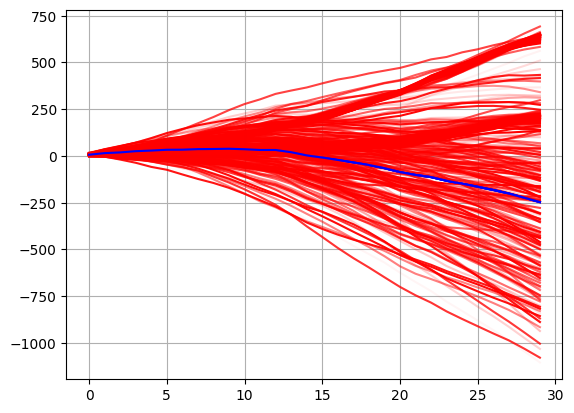

In [18]:
#Lambda=10
D = BuildD(T)
U, Delta, Vt = BuildUVDelta(D)
A = BuildA(Delta, Vt)
sh = Buildsh(T,a,b)
#Y = Computation_Y(T,Lambda,a,b)
#Y ,Lambda= Computation_Y_circ(T,a,b)
theta_tab_source,_,_,_,_,end_source = MetropolisHastings(T, Lambda, Y,a,b, 1e5, "source")
theta_tab_image,_,_,_,_,end_image = MetropolisHastings(T, Lambda, Y, a,b, 1e5,"image")
theta_tab_subdiff_source,_,_,_,_,end_subdiff_source = MetropolisHastings(T, Lambda, Y, a, b, 1e5, "subdiff_source")
theta_tab_subdiff_image,_,_,_,_,end_subdiff_image = MetropolisHastings(T, Lambda, Y, a,b, 1e5,"subdiff_image")

In [19]:
#print(Lambda)
argmax=ComputeArgmax(T, Lambda, Y,a,b)[0]

#dist_tab_source=np.sum(abs(theta_tab_source-argmax),axis=1)/sum(abs(argmax))
#dist_tab_image=np.sum(abs(theta_tab_image-argmax),axis=1)/sum(abs(argmax))
#dist_tab_subdiff_source=np.sum(abs(theta_tab_subdiff_source-argmax),axis=1)/sum(abs(argmax))
#dist_tab_subdiff_image=np.sum(abs(theta_tab_subdiff_image-argmax),axis=1)/sum(abs(argmax))

dist_tab_source=np.linalg.norm(theta_tab_source-argmax,axis=1)/np.linalg.norm(argmax)
dist_tab_image=np.linalg.norm(theta_tab_image-argmax,axis=1)/np.linalg.norm(argmax)
dist_tab_subdiff_source=np.linalg.norm(theta_tab_subdiff_source-argmax,axis=1)/np.linalg.norm(argmax)
dist_tab_subdiff_image=np.linalg.norm(theta_tab_subdiff_image-argmax,axis=1)/np.linalg.norm(argmax)

In [20]:
theta_tab_prox_image,_,_,_,_,end_prox_image = MH_Prox_Image(T, Lambda, Y, a, b)

taux d'accept 0.905
gamma 0.001
taux d'accept 0.92
gamma 0.001665
taux d'accept 0.893
gamma 0.0027972
taux d'accept 0.871
gamma 0.0046237716
taux d'accept 0.836
gamma 0.0075413714796
taux d'accept 0.74
gamma 0.012036028881441601
taux d'accept 0.722
gamma 0.0180540433221624
taux d'accept 0.669
gamma 0.026756092203444676
taux d'accept 0.594
gamma 0.038234455758722447
taux d'accept 0.527
gamma 0.051769453097310195
taux d'accept 0.48
gamma 0.06662728613623822
taux d'accept 0.457
gamma 0.08261783480893539
taux d'accept 0.415
gamma 0.10054590496247437
taux d'accept 0.372
gamma 0.11814143833090739
taux d'accept 0.363
gamma 0.13373610819058715
taux d'accept 0.3
gamma 0.15018564949802937
taux d'accept 0.297
gamma 0.15919678846791113
taux d'accept 0.3
gamma 0.16827100541058207
taux d'accept 0.257
gamma 0.178367265735217
taux d'accept 0.255
gamma 0.1813995092527157
taux d'accept 0.252
gamma 0.18412050189150644
taux d'accept 0.206
gamma 0.1863299479142045
taux d'accept 0.3
gamma 0.1799947296851215

In [51]:
theta_tab_prox_image

array([[   4.        ,   12.        ,   24.        , ..., 1624.        ,
        1740.        , 1860.        ],
       [   3.50075372,   10.75459365,   21.62919389, ..., 1473.46307498,
        1578.80534828, 1687.7725398 ],
       [   3.24584975,    9.82912055,   19.511781  , ..., 1326.11814973,
        1420.16355598, 1517.54116752],
       ...,
       [   3.02652616,    4.12477191,    5.26960708, ...,   29.97540064,
          30.53611709,   31.03553227],
       [   2.8342106 ,    3.70147826,    4.4775283 , ...,    6.76719981,
           6.31160067,    5.82358614],
       [   3.17295824,    4.33291575,    5.39130139, ...,   48.32676762,
          50.42916606,   52.62940725]])

[   6.52870383   15.17768774   18.95042311   25.59517699   28.85692896
   33.11479516   33.5934061    36.60748003   37.31945918   38.53330119
   36.03010237   32.00531646   31.94268124   20.04834193    2.98160809
   -8.5124453   -21.17286923  -34.40387296  -48.3530803   -65.27070308
  -86.35798644 -101.5218729  -113.12987041 -132.80098992 -148.47736508
 -164.86566472 -181.88341334 -201.01995404 -223.76392959 -246.79895776]


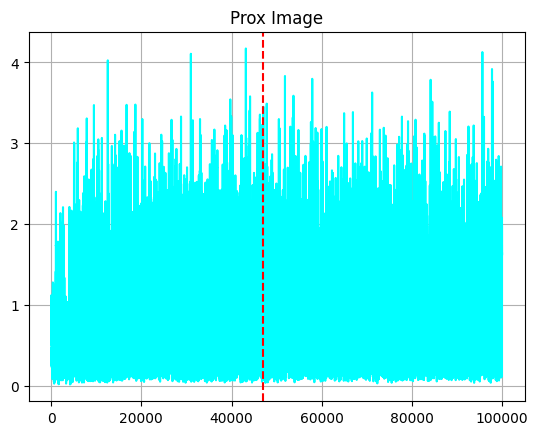

In [21]:
argmax=ComputeArgmax(T, Lambda, Y,a,b)[0]
print(argmax)
dist_tab_prox_image=np.linalg.norm(theta_tab_prox_image-argmax,axis=1)/np.linalg.norm(argmax)
plt.figure()
plt.title("Prox Image")
#plt.plot(np.mean(theta_tab_prox_image,axis=1))
plt.plot(dist_tab_prox_image, color = "cyan")
plt.axvline(end_prox_image,color="red",linestyle="--")
plt.grid()

[   6.52870383   15.17768774   18.95042311   25.59517699   28.85692896
   33.11479516   33.5934061    36.60748003   37.31945918   38.53330119
   36.03010237   32.00531646   31.94268124   20.04834193    2.98160809
   -8.5124453   -21.17286923  -34.40387296  -48.3530803   -65.27070308
  -86.35798644 -101.5218729  -113.12987041 -132.80098992 -148.47736508
 -164.86566472 -181.88341334 -201.01995404 -223.76392959 -246.79895776]


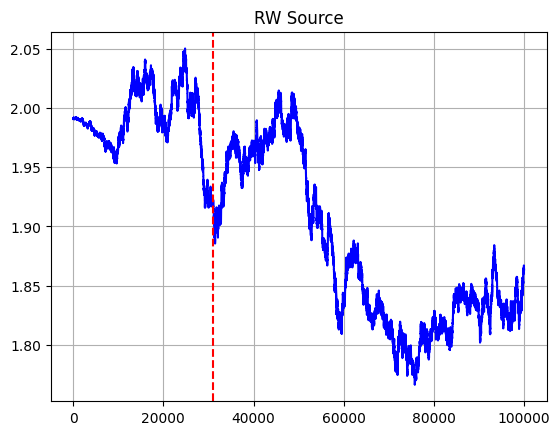

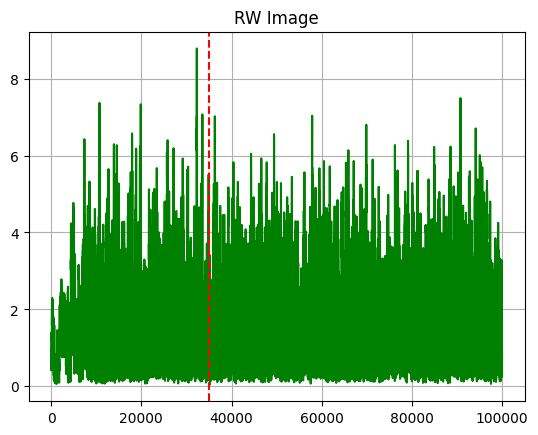

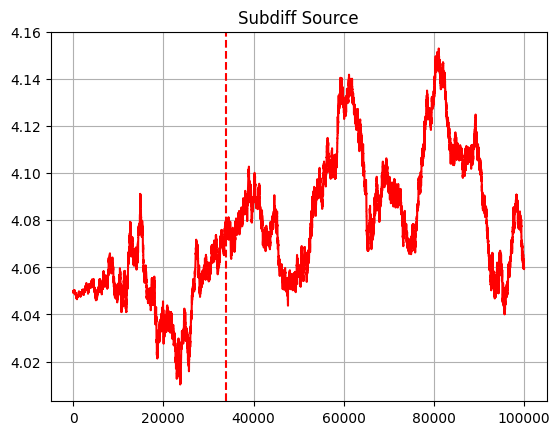

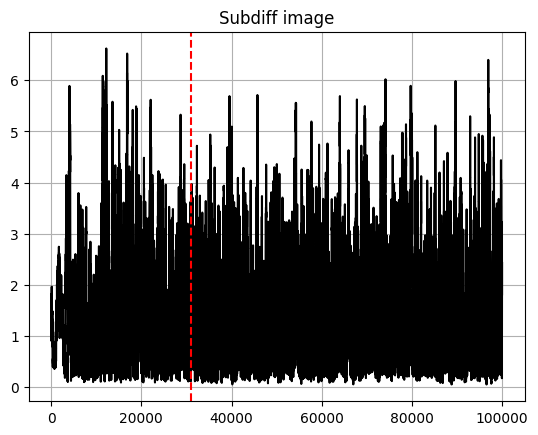

In [22]:
plt.figure()
plt.plot(dist_tab_source, color = "blue")
plt.axvline(end_source,color="red",linestyle="--")
plt.title("RW Source")
plt.grid()
plt.figure()
plt.title("RW Image")
plt.plot(dist_tab_image, color = "green")
plt.axvline(end_image,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff Source")
plt.plot(dist_tab_subdiff_source, color = "red")
plt.axvline(end_subdiff_source,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff image")
plt.plot(dist_tab_subdiff_image, color = "black")
plt.axvline(end_subdiff_image,color="red",linestyle="--")
plt.grid()
print(argmax)


> On voit que les méthodes sources ont vraiment du mal à converger vers l'argmax alors que les méthodes images convergent très rapidement pour ensuite osciller autour.

### Différence entre les valeurs simulés et l'argmax évaluées en `LogDistributionPi` en erreur relative (Comparaison à lambda fixé)

In [23]:
logpi_argmax=LogDistributionPi(argmax, Y, A, D, sh, Lambda)

dist_source = abs(LogDistributionPi_Tab(theta_tab_source, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)
dist_image = abs(LogDistributionPi_Tab(theta_tab_image, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)
dist_subdiff_source = abs(LogDistributionPi_Tab(theta_tab_subdiff_source, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)
dist_subdiff_image = abs(LogDistributionPi_Tab(theta_tab_subdiff_image, Y, A, D, sh, Lambda)-logpi_argmax)/abs(logpi_argmax)

-0.27789888884624897


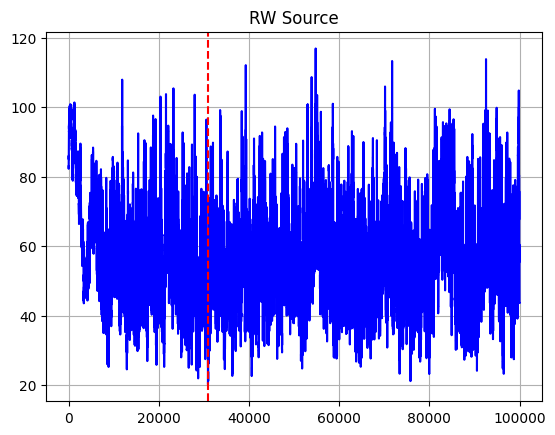

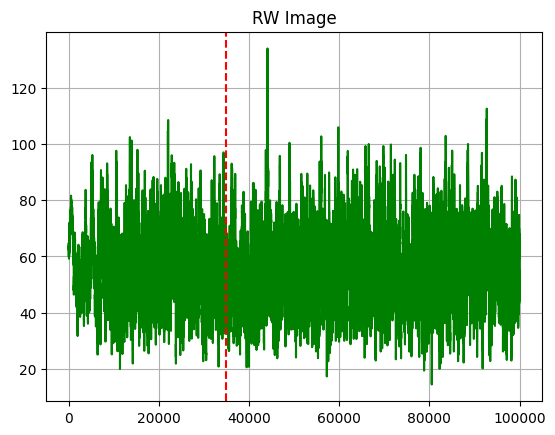

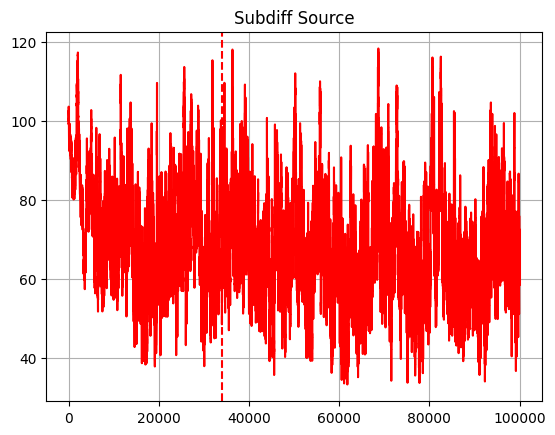

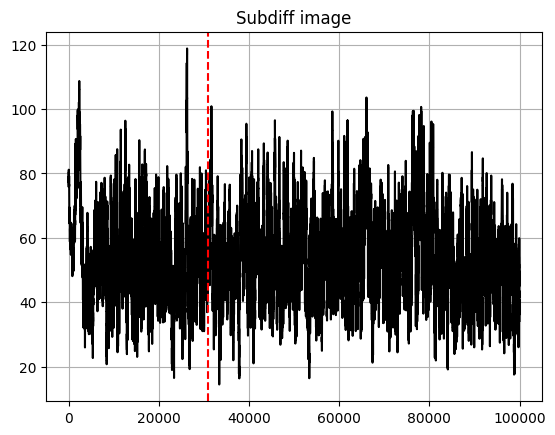

In [24]:
plt.figure()
plt.title("RW Source")
plt.plot(dist_source, color = "blue")
plt.axvline(end_source,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("RW Image")
plt.plot(dist_image, color = "green")
plt.axvline(end_image,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff Source")
plt.plot(dist_subdiff_source, color = "red")
plt.axvline(end_subdiff_source,color="red",linestyle="--")
plt.grid()
plt.figure()
plt.title("Subdiff image")
plt.plot(dist_subdiff_image, color = "black")
plt.axvline(end_subdiff_image,color="red",linestyle="--")
plt.grid()
print(logpi_argmax)

>We can see that the method in the image space converge much faster than the source method. Nevertheless, we don't see a significant improvement using the sub differential in the image space compare to the identity.

End of the burn-in


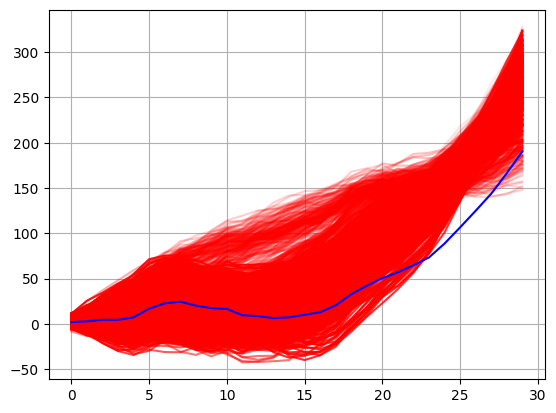

In [8]:
_,_,_,_,_,_ = MetropolisHastings(T, 0.01, Y, a, b, 1e6)

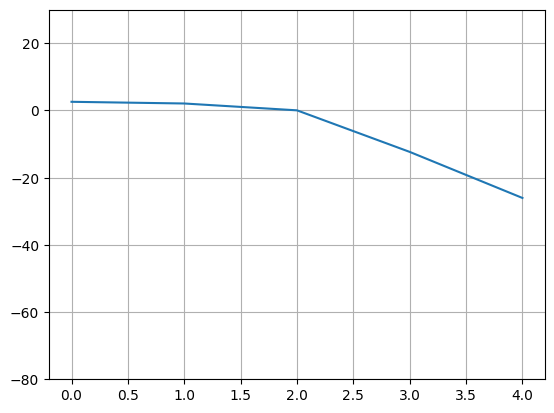

In [18]:
plt.figure()
x,x_tilde = ComputeArgmax(T,Lambda, Y,a,b)
plt.plot(x)
plt.ylim(-80, 30)
plt.grid()